# Task Time Estimates

In [107]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("../data/timeseries_base.csv", index_col = None, parse_dates = True)

In [3]:
# Updating week to be a date instead of object.
# Parse Dates doesn't work reliably. Will add other columns as needed

df['week'] = pd.to_datetime(df['week'])

In [4]:
df.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,len_of_stay,admitdate,dischargedate,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,17,2019-01-01,2019-01-18,6,5,11,1.0,0.857143,0.0,1,0
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,16,2019-01-01,2019-01-17,6,4,10,1.0,0.857143,0.0,1,0
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,30,2019-01-01,2019-01-31,6,4,10,1.0,0.857143,0.0,1,0
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,15,2019-01-01,2019-01-16,6,3,9,1.0,0.857143,0.0,1,0
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,7,2019-01-01,2019-01-08,6,2,8,1.0,0.857143,0.0,1,0


In [5]:
len(df)

148021

In [6]:
#Assuming a "normal" distribution, take the mean of 1000 draws of the time estimates
Task1 = 2.12
Task2 = 4.95
Task3 = 61.67
Task4 = 10.04
Task5 = 7.95
Task6 = 10.08
Task7 = 5
Task8 = 6.99
Task9 = 4.03
Task10 = 16.54
Task11 = 37.1
Task12 = 5.04
Task13 = 5
Task14 = 6.34
Task15 = 14.99
Task16 = 10
Task17 = 3

### Contract Type 1

In [7]:
#if including remote workers. Replacing in person task 13 with remote task 17 bc it is more efficient
df.loc[df['contracttype'] == 'CT1', 'regular_time'] = df['regular']*(Task9 + Task12 + Task15 + Task14)
df.loc[df['contracttype'] == 'CT1', 'discharge_time'] = df['discharge']*(Task2 + Task8)
df.loc[df['contracttype'] == 'CT1', 'admit_time'] = df['admit']*(Task1 + Task4 + Task5 + Task6)
df.loc[df['contracttype'] == 'CT1', 'remote_time'] = df['regular']*(Task17)

### Contract Type 2

In [8]:
#if including remote workers. Replacing in person task 13 with remote task 17 bc it is more efficient
df.loc[df['contracttype'] == 'CT2', 'regular_time'] = df['regular']*(Task9 + Task11 + Task14)
df.loc[df['contracttype'] == 'CT2', 'discharge_time'] = df['discharge']*(Task7 + Task8 + Task2 + Task10)
df.loc[df['contracttype'] == 'CT2', 'admit_time'] = df['admit']*(Task1 + Task3 + Task5 + Task6)
df.loc[df['contracttype'] == 'CT2', 'remote_time'] = df['regular']*(Task17)

In [9]:
df['onsite_time'] = df['regular_time'] + df['discharge_time'] + df['admit_time']

In [10]:
# Rounding to nearest 10th
df['admit_time'] = df['admit_time'].round(2)
df['remote_time'] = df['remote_time'].round(2)
df['onsite_time'] = df['onsite_time'].round(2)

In [11]:
df.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,len_of_stay,admitdate,...,admit,regular,discharge,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,17,2019-01-01,...,1.0,0.857143,0.0,1,0,40.688571,0.0,81.82,2.57,122.51
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,16,2019-01-01,...,1.0,0.857143,0.0,1,0,40.688571,0.0,81.82,2.57,122.51
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,30,2019-01-01,...,1.0,0.857143,0.0,1,0,40.688571,0.0,81.82,2.57,122.51
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,15,2019-01-01,...,1.0,0.857143,0.0,1,0,40.688571,0.0,81.82,2.57,122.51
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,7,2019-01-01,...,1.0,0.857143,0.0,1,0,40.688571,0.0,81.82,2.57,122.51


## Total Hours

In [40]:
# convert time from minutes to hours
df['onsite_hours'] = np.round(df['onsite_time']/60, 2)
df['remote_hours'] = np.round(df['remote_time']/60, 2)

In [41]:
grouped = df.groupby('county')

In [42]:
grouped.sum()

,pid,episodeid,providerpracticezipcode,len_of_stay,admit_week_days,discharge_week_days,discharge_plus_admit,admit,regular,discharge,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time,onsite_hours,remote_hours
county,,,,,,,,,,,,,,,,,,,
Anderson,401162,7736188,21755509,6257,1104,1079,2183,81.0,226.0,81.0,81,81,10728.22,2711.88,6627.42,678.10,20067.42,334.28,11.30
Andrews,8057,298018,557998,301,14,49,63,1.0,6.0,1.0,1,1,284.82,33.48,81.82,18.00,400.12,6.67,0.30
Angelina,882133,39819466,76895029,28278,4003,4043,8046,267.0,844.0,267.0,267,267,34175.53,7086.72,17405.76,2532.31,58667.88,978.13,42.23
Aransas,108914,4735443,10032896,3281,508,465,973,36.0,100.0,36.0,36,36,4525.09,1183.74,2893.89,300.04,8602.67,143.36,4.98
Archer,184,136588,305404,80,4,24,28,1.0,3.0,1.0,1,1,142.41,33.48,81.82,9.00,257.71,4.30,0.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wise,742744,9088276,40213910,18265,2143,1914,4057,126.0,437.0,126.0,126,126,19122.74,4024.62,9844.65,1311.20,32991.81,549.98,21.76
Wood,281981,5232072,13986649,4319,792,695,1487,54.0,147.0,54.0,54,54,6773.25,1678.68,4108.50,441.03,12560.40,209.26,7.36
Yoakum,40962,1007809,1903752,400,83,131,214,8.0,17.0,8.0,8,8,806.99,267.84,654.56,51.00,1729.39,28.80,0.85


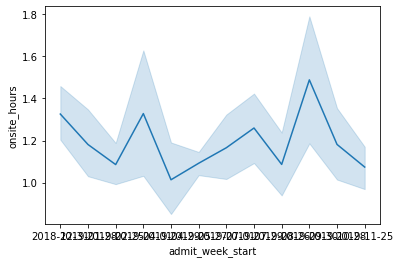

In [100]:
#look at one county
brazos = df[df['county'] == 'Brazos']
from seaborn import lineplot
lineplot(x='admit_week_start', y='onsite_hours', data=brazos)

We are going to use the first 3 months of the year to make recommendations. This is due to the fact that we can assume there is seasonality within the data where at the beginning of the year, many more patients are admitted to the snf's and nearing the end of the year, this number drops off. So, first we need to roll up weekly data into a monthly level.

In [157]:
grouped = df.groupby(['county', 'admit_week_start'])

Using admit week start creates an issue in that there are no values returned for march. All patients that were admitted on 3/1 had a week start in Feb. and all patients admitted on 4/1 had a week start in April so no weeks actually started in March. Need to use admit date instead

In [158]:
grouped.head()

,week,pid,episodeid,contracttype,county,providerpracticezipcode,admit_week_start,discharge_week_start,len_of_stay,admitdate,...,week_admit,week_discharge,regular_time,discharge_time,admit_time,remote_time,onsite_time,onsite_hours,remote_hours,month
0,2018-12-31,6,17500,CT2,Brazos,77845,2018-12-31,2019-01-14,17,2019-01-01,...,1,0,40.688571,0.00,81.82,2.57,122.51,2.04,0.04,1
1,2018-12-31,6,17793,CT2,Brazos,77845,2018-12-31,2019-01-14,16,2019-01-01,...,1,0,40.688571,0.00,81.82,2.57,122.51,2.04,0.04,1
2,2018-12-31,6,18516,CT2,Brazos,77845,2018-12-31,2019-01-28,30,2019-01-01,...,1,0,40.688571,0.00,81.82,2.57,122.51,2.04,0.04,1
3,2018-12-31,6,19016,CT2,Brazos,77845,2018-12-31,2019-01-14,15,2019-01-01,...,1,0,40.688571,0.00,81.82,2.57,122.51,2.04,0.04,1
4,2018-12-31,6,19129,CT2,Brazos,77845,2018-12-31,2019-01-07,7,2019-01-01,...,1,0,40.688571,0.00,81.82,2.57,122.51,2.04,0.04,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145851,2019-12-23,398,34449,CT2,Comanche,76444,2019-11-25,2019-12-23,23,2019-12-01,...,0,1,13.562857,33.48,0.00,0.86,47.04,0.78,0.01,12
145853,2019-12-23,415,54202,CT1,Tyler,75979,2019-11-25,2020-03-09,100,2019-12-01,...,0,0,30.400000,0.00,0.00,3.00,30.40,0.51,0.05,12
145919,2019-12-23,555,35373,CT2,Gonzales,78629,2019-11-25,2019-12-23,24,2019-12-01,...,0,1,20.344286,33.48,0.00,1.29,53.82,0.90,0.02,12
145979,2019-12-23,702,34658,CT2,Houston,75835,2019-11-25,2019-12-23,26,2019-12-01,...,0,1,33.907143,33.48,0.00,2.14,67.39,1.12,0.04,12


In [166]:
df['month'] = pd.DatetimeIndex(df['admitdate']).month

In [169]:
months = [1, 2, 3]
df = df[df.month.isin(months)]

In [175]:
#can group by county and month to see the number of hours required
df.groupby(['county', 'month']).onsite_hours.agg(['sum', 'max'])

sum   max
county   month             
Anderson 1      23.03  2.04
         2      61.98  2.04
         3      35.45  1.70
Angelina 1      72.19  2.71
         2      94.06  1.80
...               ...   ...
Yoakum   2       3.50  1.70
         3       7.00  1.70
Young    1      12.87  2.04
         2       8.58  1.70
         3       9.37  1.80

[496 rows x 2 columns]

actually only need to group by county and get the mean of these three months. here, sum is the total number of hours over the three months and mean is the average time per patient in the month

In [184]:
df.groupby('county', as_index=False).onsite_hours.agg(['sum', 'mean'])

,sum,mean
county,,
Anderson,120.46,1.115370
Angelina,240.58,0.954683
Aransas,36.24,1.169032
Atascosa,94.04,1.033407
Austin,23.03,1.096667
...,...,...
Winkler,3.50,1.750000
Wise,179.15,0.995278
Wood,41.80,1.161111


In [249]:
sums = df.groupby(['county', 'month'])[['onsite_hours']].sum().reset_index()

In [250]:
sums = sums.groupby('county')['onsite_hours'].mean().reset_index()

In [251]:
sums['onsite_hours'].min()

1.7100000000000002

In [252]:
sums['onsite_hours'].max()

2073.9300000000126

In [259]:
#per week how many hours by county in the first 3 months of the year
weekly_sums = sums['onsite_hours']/4
weekly_sums

0      10.038333
1      20.048333
2       3.020000
3       7.836667
4       1.919167
         ...    
182     0.875000
183    14.929167
184     3.483333
185     1.312500
186     2.568333
Name: onsite_hours, Length: 187, dtype: float64

In [254]:
#How many full time workers would be needed in each county given the total time estimates?
weekly_sums/40

0      0.250958
1      0.501208
2      0.075500
3      0.195917
4      0.047979
         ...   
182    0.021875
183    0.373229
184    0.087083
185    0.032813
186    0.064208
Name: onsite_hours, Length: 187, dtype: float64